### Package Imports

Packages and Settings for the entire notebook

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# seed to maintain the results
np.random.seed(10)

# Ignore Future Warnings
import warnings
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

### Dataset Import

Import the and merge individual monthly datasets into one dataFrame ```bike_data```

In [157]:
df1 = pd.read_csv('data/201901-bluebikes-tripdata.csv')
df2 = pd.read_csv('data/201902-bluebikes-tripdata.csv')
df3 = pd.read_csv('data/201903-bluebikes-tripdata.csv')
df4 = pd.read_csv('data/201904-bluebikes-tripdata.csv')
df5 = pd.read_csv('data/201905-bluebikes-tripdata.csv')
df6 = pd.read_csv('data/201906-bluebikes-tripdata.csv')
df7 = pd.read_csv('data/201907-bluebikes-tripdata.csv')
df8 = pd.read_csv('data/201908-bluebikes-tripdata.csv')
df9 = pd.read_csv('data/201909-bluebikes-tripdata.csv')
df10 = pd.read_csv('data/201910-bluebikes-tripdata.csv')
df11 = pd.read_csv('data/201911-bluebikes-tripdata.csv')
df12 = pd.read_csv('data/201912-bluebikes-tripdata.csv')

Merge the dataset using the ```concat``` pandas method

In [158]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

Exporting the merged dataset and make a copy of the original dataset

In [159]:
df.to_csv('bike_data_2019.csv', index=False)

df_bike_data = df.copy()

### Dataset Description

**Shape**, **Number of Features**, **Descriptive Statistics** of the dataset

Show the Shape of the dataset

In [160]:
df_bike_data.shape

(2522771, 15)

Show the detailed information on the merged dataset

In [161]:
df_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522771 entries, 0 to 92207
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 308.0+ MB


Viewing the Features/Columns within the dataset

In [162]:
df_bike_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

Preview the dataset

In [163]:
df_bike_data.head(5)

tripduration                 starttime                  stoptime  \
0           371  2019-01-01 00:09:13.7980  2019-01-01 00:15:25.3360   
1           264  2019-01-01 00:33:56.1820  2019-01-01 00:38:20.8800   
2           458  2019-01-01 00:41:54.6000  2019-01-01 00:49:33.2730   
3           364  2019-01-01 00:43:32.5710  2019-01-01 00:49:37.4260   
4           681  2019-01-01 00:49:56.4640  2019-01-01 01:01:17.7010   

   start station id                          start station name  \
0                80     MIT Stata Center at Vassar St / Main St   
1               117                        Binney St / Sixth St   
2                68       Central Square at Mass Ave / Essex St   
3                89  Harvard Law School at Mass Ave / Jarvis St   
4                73     Harvard Square at Brattle St / Eliot St   

   start station latitude  start station longitude  end station id  \
0               42.362131               -71.091156             179   
1               42.366162               -71.086883             189   
2               42.365070               -71.103100              96   
3               42.379011               -71.119945             334   
4               42.373231               -71.120886             367   

                                    end station name  end station latitude  \
0                                      MIT Vassar St             42.355601   
1                                          Kendall T             42.362428   
2  Cambridge Main Library at Broadway / Trowbridg...             42.373379   
3                          Mass Ave at Hadley/Walden             42.391210   
4                          Vassal Lane at Tobin/VLUS             42.383932   

   end station longitude  bikeid    usertype  birth year  gender  
0             -71.103945    3689  Subscriber        1987       1  
1             -71.084955    4142  Subscriber        1990       1  
2             -71.111075    1628  Subscriber        1977       1  
3             -71.122608    2969  Subscriber        1993       1  
4             -71.139613    3469  Subscriber        1979       2

Dataset Description Statistics

In [164]:
df_bike_data.describe()

tripduration  start station id  start station latitude  \
count  2.522771e+06      2.522771e+06            2.522771e+06   
mean   2.178407e+03      1.423010e+02            4.235746e+01   
std    1.098031e+05      1.183249e+02            5.584549e-02   
min    6.100000e+01      1.000000e+00            0.000000e+00   
25%    4.180000e+02      5.500000e+01            4.234871e+01   
50%    7.070000e+02      9.900000e+01            4.235810e+01   
75%    1.185000e+03      1.900000e+02            4.236599e+01   
max    4.256714e+07      4.460000e+02            4.241480e+01   

       start station longitude  end station id  end station latitude  \
count             2.522771e+06    2.522771e+06          2.522771e+06   
mean             -7.108794e+01    1.416275e+02          4.235732e+01   
std               9.302137e-02    1.180612e+02          7.722553e-02   
min              -7.116649e+01    1.000000e+00          0.000000e+00   
25%              -7.110441e+01    5.400000e+01          4.234871e+01   
50%              -7.108981e+01    9.800000e+01          4.235810e+01   
75%              -7.106892e+01    1.900000e+02          4.236599e+01   
max               0.000000e+00    4.460000e+02          4.241480e+01   

       end station longitude        bikeid    birth year        gender  
count           2.522771e+06  2.522771e+06  2.522771e+06  2.522771e+06  
mean           -7.108749e+01  3.637649e+03  1.984724e+03  1.124730e+00  
std             1.291085e-01  1.287294e+03  1.154858e+01  5.738727e-01  
min            -7.116649e+01  1.000000e+00  1.886000e+03  0.000000e+00  
25%            -7.110441e+01  2.745000e+03  1.977000e+03  1.000000e+00  
50%            -7.108822e+01  3.670000e+03  1.989000e+03  1.000000e+00  
75%            -7.106781e+01  4.497000e+03  1.994000e+03  1.000000e+00  
max             0.000000e+00  6.173000e+03  2.003000e+03  2.000000e+00

**Important Features identified**

- tripduration
- start station id
- bikeid
- birth year
- usertype
- gender

#### New Features **Important Features identified**

Addition of new features based on the ```starttime``` feature

In [165]:
# Check data types
df_bike_data.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [166]:
# Convert the starttime and stoptime to a datetime format

df_bike_data['starttime'] = pd.to_datetime(df_bike_data['starttime'])
df_bike_data['stoptime'] = pd.to_datetime(df_bike_data['stoptime'])


In [167]:
# Check data types
df_bike_data.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
dtype: object

Add more features based on ```starttime```

In [168]:
df_bike_data["startTimeDate"] = df_bike_data['starttime'].dt.date
# df_bike_data["startTripYear"] = df_bike_data['starttime'].dt.year
df_bike_data["startTripMonth"] = df_bike_data['starttime'].dt.month
df_bike_data["startTripDayOfMonth"] = df_bike_data['starttime'].dt.day
df_bike_data["startTripDayOfWeek"] = df_bike_data['starttime'].dt.dayofweek
df_bike_data["startTripHour"] = df_bike_data['starttime'].dt.hour
df_bike_data["endTripHour"] = df_bike_data['stoptime'].dt.hour


In [169]:
df_bike_data.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
startTimeDate                      object
startTripMonth                      int64
startTripDayOfMonth                 int64
startTripDayOfWeek                  int64
startTripHour                       int64
endTripHour                         int64
dtype: object

Add ```userAge``` Feature calculated from the ```birth Year``` feature as of 2019

In [170]:
df_bike_data["userAge"] = 2019 - df_bike_data['birth year']

Add ```subscriber``` and ```customer``` Features extracted from the ```usertype```

In [171]:
df_bike_data['subscriber'] = np.where(df_bike_data['usertype'] == 'Subscriber', 1, 0)

df_bike_data['customer'] = np.where(df_bike_data['usertype'] == 'Customer', 1, 0)

Add ```gender_male```, ``gender_female`` and ```gender_unknown``` Features extracted from the ```gender```

In [172]:
df_bike_data['gender_male'] = np.where(df_bike_data['gender'] == 1, 1, 0)
df_bike_data['gender_female'] = np.where(df_bike_data['gender'] == 2, 1, 0)
df_bike_data['gender_unknown'] = np.where(df_bike_data['gender'] == 0, 1, 0)

In [173]:
df_bike_data.head(5)

tripduration               starttime                stoptime  \
0           371 2019-01-01 00:09:13.798 2019-01-01 00:15:25.336   
1           264 2019-01-01 00:33:56.182 2019-01-01 00:38:20.880   
2           458 2019-01-01 00:41:54.600 2019-01-01 00:49:33.273   
3           364 2019-01-01 00:43:32.571 2019-01-01 00:49:37.426   
4           681 2019-01-01 00:49:56.464 2019-01-01 01:01:17.701   

   start station id                          start station name  \
0                80     MIT Stata Center at Vassar St / Main St   
1               117                        Binney St / Sixth St   
2                68       Central Square at Mass Ave / Essex St   
3                89  Harvard Law School at Mass Ave / Jarvis St   
4                73     Harvard Square at Brattle St / Eliot St   

   start station latitude  start station longitude  end station id  \
0               42.362131               -71.091156             179   
1               42.366162               -71.086883             189   
2               42.365070               -71.103100              96   
3               42.379011               -71.119945             334   
4               42.373231               -71.120886             367   

                                    end station name  end station latitude  \
0                                      MIT Vassar St             42.355601   
1                                          Kendall T             42.362428   
2  Cambridge Main Library at Broadway / Trowbridg...             42.373379   
3                          Mass Ave at Hadley/Walden             42.391210   
4                          Vassal Lane at Tobin/VLUS             42.383932   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -71.103945    3689  Subscriber        1987       1   
1             -71.084955    4142  Subscriber        1990       1   
2             -71.111075    1628  Subscriber        1977       1   
3             -71.122608    2969  Subscriber        1993       1   
4             -71.139613    3469  Subscriber        1979       2   

  startTimeDate  startTripMonth  startTripDayOfMonth  startTripDayOfWeek  \
0    2019-01-01               1                    1                   1   
1    2019-01-01               1                    1                   1   
2    2019-01-01               1                    1                   1   
3    2019-01-01               1                    1                   1   
4    2019-01-01               1                    1                   1   

   startTripHour  endTripHour  userAge  subscriber  customer  gender_male  \
0              0            0       32           1         0            1   
1              0            0       29           1         0            1   
2              0            0       42           1         0            1   
3              0            0       26           1         0            1   
4              0            1       40           1         0            0   

   gender_female  gender_unknown  
0              0               0  
1              0               0  
2              0               0  
3              0               0  
4              1               0

### Data Cleaning

Find the number of missing values in each column

In [174]:
missing_values = df_bike_data.isnull().sum()
pd.DataFrame(missing_values)

0
tripduration             0
starttime                0
stoptime                 0
start station id         0
start station name       0
start station latitude   0
start station longitude  0
end station id           0
end station name         0
end station latitude     0
end station longitude    0
bikeid                   0
usertype                 0
birth year               0
gender                   0
startTimeDate            0
startTripMonth           0
startTripDayOfMonth      0
startTripDayOfWeek       0
startTripHour            0
endTripHour              0
userAge                  0
subscriber               0
customer                 0
gender_male              0
gender_female            0
gender_unknown           0

#### Detecting outliers using **IQR**

Selected Features
- birth Year
- tripduration

Identifying the outliers in the Raw dataset

- Using IQR
IQR tells how spread the middle values are. It can be used to tell when a value 
is too far from the middle.

- An outlier is a point which falls more than 1.5 times the interquartile range
above the third quartile or below the first quartile.

In [175]:
# method to detect outliers
def detect_outliers(df):
    """
    Detect outliers in the data using the interquartile range (IQR) method.
    Returns a DataFrame with the list of the columns considered for outliers and the q1, q3, IQR and the lower and upper bounds
    """
    # first and third quartiles
    q1, q3 = df.quantile([0.25, 0.75])

    # the IQR
    iqr = q3 - q1

    # lower and upper bounds
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    df_resp = [q1, q3, iqr, lower_bound, upper_bound]
    df_resp_cols = ["First Quartile q1", "Third Quartile q3", "Interquartile range IQR", "Lower bound", "Upper bound"]

    # Return pandas IQR dataframe 
    return pd.DataFrame(df_resp, df_resp_cols)

### Outliers - **Birth Year**

Detect outliers in the **birth Year** Feature

In [176]:
detect_outliers(df_bike_data['birth year'])

0
First Quartile q1        1977.0
Third Quartile q3        1994.0
Interquartile range IQR    17.0
Lower bound              1951.5
Upper bound              2019.5

Visualize the outliers in the **birth Year** Feature using the **box plot**

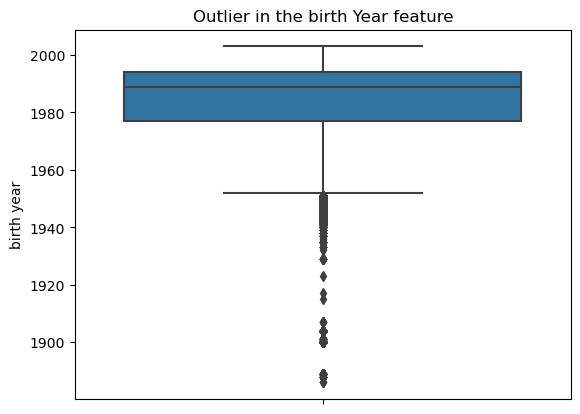

In [177]:
plt.title("Outlier in the birth Year feature")
sns.boxplot(y=df_bike_data["birth year"]);

Remove the Outliers in the **birth Year** Feature

- Assumption is the year 1952

In [178]:
df_bike_data_outliers_birth_year = df_bike_data[df_bike_data['birth year'] < 1952]

df_bike_data = df_bike_data[df_bike_data['birth year'] >= 1952]

In [179]:
print(f'The outliers {df_bike_data_outliers_birth_year.shape}')
print(f'The Data Without outliers {df_bike_data.shape}')

The outliers (12403, 27)
The Data Without outliers (2510368, 27)


Visualising the data without the outliers - **birth Year**

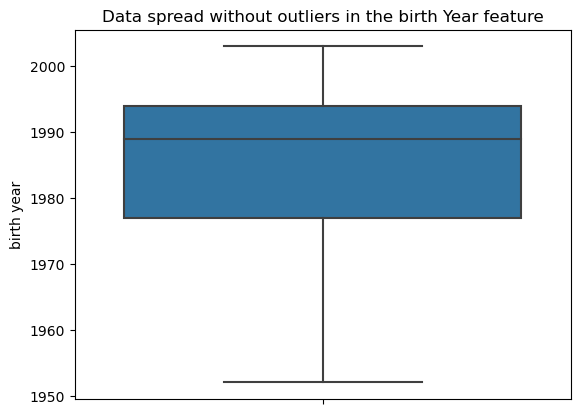

In [180]:
plt.title("Data spread without outliers in the birth Year feature")
sns.boxplot(y=df_bike_data["birth year"]);

### Outliers - **Trip Duration**

Detect outliers in the **tripduration** Feature

In [181]:
detect_outliers(df_bike_data['tripduration'])

0
First Quartile q1         418.0
Third Quartile q3        1185.0
Interquartile range IQR   767.0
Lower bound              -732.5
Upper bound              2335.5

Visualize the outliers in the **tripduration** Feature using the **box plot**

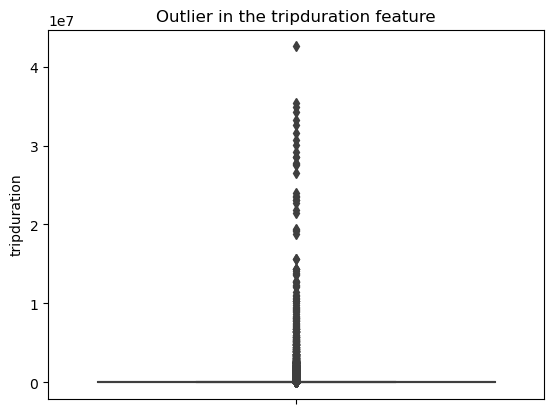

In [182]:
plt.title("Outlier in the tripduration feature")
sns.boxplot(y=df_bike_data["tripduration"]);

Remove the Outliers in the **tripduration** Feature

- Assumption is the tripduration ```<=``` 2105

In [183]:
df_bike_data_outliers_trip_duration = df_bike_data[df_bike_data['tripduration'] > 2105]

df_bike_data = df_bike_data[df_bike_data['tripduration'] <= 2105]

In [184]:
print(f'The outliers tripduration: {df_bike_data_outliers_trip_duration.shape}')
print(f'The Data Without outliers tripduration: {df_bike_data.shape}')

The outliers tripduration: (200140, 27)
The Data Without outliers tripduration: (2310228, 27)


Visualising the data without the outliers - **tripduration**

**All outliers are removed**
Outliers are removed based on the box plot visualizations

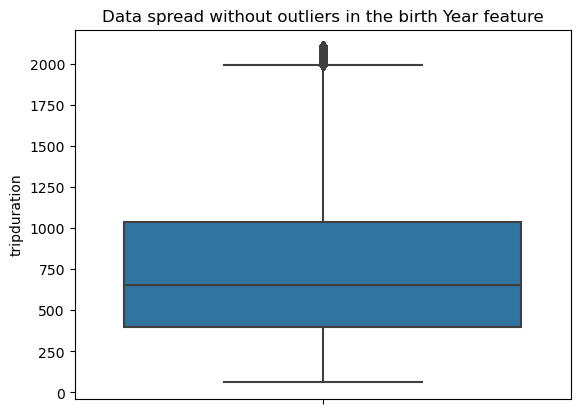

In [185]:
plt.title("Data spread without outliers in the birth Year feature")
sns.boxplot(y=df_bike_data["tripduration"]);

### Correlation

Visualising the entire dataset to determine correlation

In [186]:
# Calculating the Correlation Matrix
df_corr = df_bike_data.corr()
df_corr

tripduration  start station id  \
tripduration                 1.000000          0.016592   
start station id             0.016592          1.000000   
start station latitude      -0.014607          0.016849   
start station longitude     -0.003851         -0.007587   
end station id               0.024551          0.038217   
end station latitude        -0.012349          0.006907   
end station longitude       -0.003416          0.000423   
bikeid                      -0.004636          0.025897   
birth year                  -0.103567          0.005098   
gender                      -0.042213          0.003103   
startTripMonth              -0.001075          0.071540   
startTripDayOfMonth          0.002137          0.005062   
startTripDayOfWeek           0.069131          0.013490   
startTripHour                0.033516         -0.057618   
endTripHour                  0.050989         -0.056531   
userAge                      0.103567         -0.005098   
subscriber                  -0.274813         -0.011094   
customer                     0.274813          0.011094   
gender_male                 -0.172022         -0.014846   
gender_female                0.067432          0.010177   
gender_unknown               0.183802          0.009297   

                         start station latitude  start station longitude  \
tripduration                          -0.014607                -0.003851   
start station id                       0.016849                -0.007587   
start station latitude                 1.000000                -0.944597   
start station longitude               -0.944597                 1.000000   
end station id                         0.011597                 0.000990   
end station latitude                   0.202904                -0.177983   
end station longitude                 -0.177862                 0.198620   
bikeid                                -0.002078                -0.000301   
birth year                            -0.000773                -0.037547   
gender                                 0.007865                -0.015214   
startTripMonth                        -0.003160                -0.004976   
startTripDayOfMonth                   -0.001380                 0.001689   
startTripDayOfWeek                    -0.000874                -0.009453   
startTripHour                         -0.001802                 0.001580   
endTripHour                           -0.002014                 0.001645   
userAge                                0.000773                 0.037547   
subscriber                             0.010960                -0.015224   
customer                              -0.010960                 0.015224   
gender_male                            0.000307                 0.004593   
gender_female                          0.004911                -0.012354   
gender_unknown                        -0.007910                 0.010997   

                         end station id  end station latitude  \
tripduration                   0.024551             -0.012349   
start station id               0.038217              0.006907   
start station latitude         0.011597              0.202904   
start station longitude        0.000990             -0.177983   
end station id                 1.000000              0.010739   
end station latitude           0.010739              1.000000   
end station longitude         -0.003193             -0.971496   
bikeid                         0.023958             -0.000637   
birth year                     0.003163             -0.001855   
gender                         0.003431              0.006952   
startTripMonth                 0.067686             -0.002364   
startTripDayOfMonth            0.003719             -0.001775   
startTripDayOfWeek             0.009425             -0.001060   
startTripHour                  0.058328              0.003402   
endTripHour                    0.056935              0.003116   
userAge      

The Correlation **Heatmap**

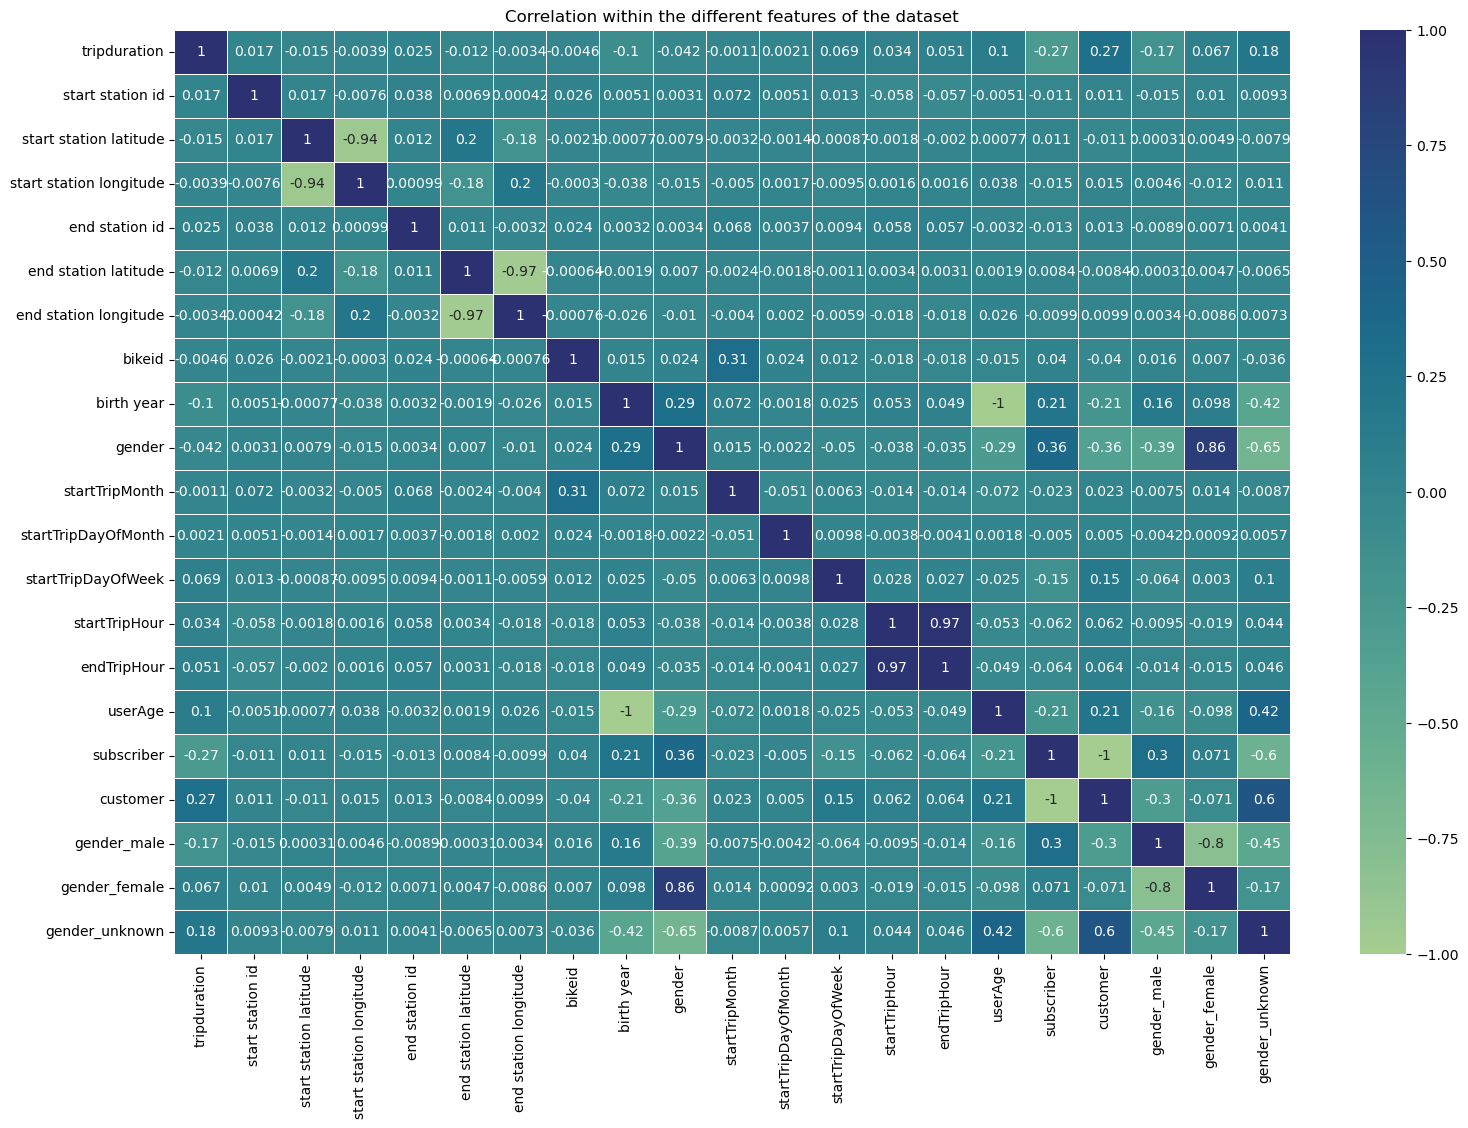

In [187]:
# Heatmap
plt.figure(figsize=(18,12))
plt.title("Correlation within the different features of the dataset")
plt.xlabel('Features')
plt.ylabel('Features')
sns.heatmap(df_bike_data.corr(), cbar=True, linewidths=0.5, cmap="crest", annot=True)
plt.show();

Renaming the Columns to camelCase

In [188]:
df_bike_data.head(1)

tripduration               starttime                stoptime  \
0           371 2019-01-01 00:09:13.798 2019-01-01 00:15:25.336   

   start station id                       start station name  \
0                80  MIT Stata Center at Vassar St / Main St   

   start station latitude  start station longitude  end station id  \
0               42.362131               -71.091156             179   

  end station name  end station latitude  end station longitude  bikeid  \
0    MIT Vassar St             42.355601             -71.103945    3689   

     usertype  birth year  gender startTimeDate  startTripMonth  \
0  Subscriber        1987       1    2019-01-01               1   

   startTripDayOfMonth  startTripDayOfWeek  startTripHour  endTripHour  \
0                    1                   1              0            0   

   userAge  subscriber  customer  gender_male  gender_female  gender_unknown  
0       32           1         0            1              0               0

In [189]:
# Rename Columns to common format - e.g camelCase
df_bike_data = df_bike_data.rename(columns={'tripduration': 'tripDuration',
                   'starttime': "startTime",
                   'stoptime': 'stopTime',
                   'start station id': 'startStationId',
                   'start station name': 'startStationName',
                   'start station latitude': 'startStationLatitude',
                   'start station longitude': 'startStationLongitude',
                   'end station id': 'endStationId',
                   'end station name': 'endStationName',
                   'end station latitude': 'endStationlatitude',
                   'end station longitude': 'endStationLongitude',
                   'bikeid': 'bikeId',
                   'usertype': 'userType',
                   'birth year': 'birthYear',
                   'gender': 'gender',
                   'startTimeDate': 'startTimeDate',
                   'startTripMonth': 'startTripMonth',
                   'startTripDayOfMonth': 'startTripDayOfMonth',
                   'startTripDayOfWeek': 'startTripDayOfWeek',
                   'startTripHour': 'startTripHour',
                   'endTripHour': 'endTripHour',
                   'userAge': 'userAge',
                   'subscriber': 'subscriber',
                   'customer': 'customer',
                   'gender_male': 'genderMale',
                   'gender_female': 'genderFemale',
                   'gender_unknown': 'genderUnknown'
                  })

df_bike_data.tail(1)

tripDuration               startTime                stopTime  \
92207            63 2019-12-31 23:57:49.672 2019-12-31 23:58:52.973   

       startStationId startStationName  startStationLatitude  \
92207             352          Ring Rd             42.348278   

       startStationLongitude  endStationId            endStationName  \
92207             -71.080449           372  Boylston St at Exeter St   

       endStationlatitude  endStationLongitude  bikeId    userType  birthYear  \
92207           42.349589           -71.079468    3205  Subscriber       1960   

       gender startTimeDate  startTripMonth  startTripDayOfMonth  \
92207       1    2019-12-31              12                   31   

       startTripDayOfWeek  startTripHour  endTripHour  userAge  subscriber  \
92207                   1             23           23       59           1   

       customer  genderMale  genderFemale  genderUnknown  
92207         0           1             0              0

Remove the starttime and startTimeDate Features

In [190]:
df_bike_data.drop(['startTime', 'startTimeDate'], axis=1, inplace=True)

In [191]:
df_bike_data.head(1)

tripDuration                stopTime  startStationId  \
0           371 2019-01-01 00:15:25.336              80   

                          startStationName  startStationLatitude  \
0  MIT Stata Center at Vassar St / Main St             42.362131   

   startStationLongitude  endStationId endStationName  endStationlatitude  \
0             -71.091156           179  MIT Vassar St           42.355601   

   endStationLongitude  bikeId    userType  birthYear  gender  startTripMonth  \
0           -71.103945    3689  Subscriber       1987       1               1   

   startTripDayOfMonth  startTripDayOfWeek  startTripHour  endTripHour  \
0                    1                   1              0            0   

   userAge  subscriber  customer  genderMale  genderFemale  genderUnknown  
0       32           1         0           1             0              0

Remove trips that were made within the same station, since they do not cause imbalance at the station

Remove Trips that started and ended within the same hour at the same station

In [192]:
df_bike_data = df_bike_data[(df_bike_data['startStationId'] != df_bike_data['endStationId']) & (df_bike_data['startTripHour'] != df_bike_data['endTripHour'])]

In [193]:
df_bike_data.shape

(461635, 25)

In [194]:
df_bike_data.head(1)

tripDuration                stopTime  startStationId  \
4           681 2019-01-01 01:01:17.701              73   

                          startStationName  startStationLatitude  \
4  Harvard Square at Brattle St / Eliot St             42.373231   

   startStationLongitude  endStationId             endStationName  \
4             -71.120886           367  Vassal Lane at Tobin/VLUS   

   endStationlatitude  endStationLongitude  bikeId    userType  birthYear  \
4           42.383932           -71.139613    3469  Subscriber       1979   

   gender  startTripMonth  startTripDayOfMonth  startTripDayOfWeek  \
4       2               1                    1                   1   

   startTripHour  endTripHour  userAge  subscriber  customer  genderMale  \
4              0            1       40           1         0           0   

   genderFemale  genderUnknown  
4             1              0

### Grouping the dataset
Since the problem statement requires to determine the bike count at each station

**Assumption**
1. The Assumption taken into account is the total count of bikes at each station
 at a given point in time.

2. So we group the dataset by the ```stationStartName(stationStartId)```, ```startTripMonth```,
```startTripDayOfWeek``` and ```startTimeDate```

3. We Take the count of the ```bikeId```, the average of the ```userAge```,  the count of the
```trips per station``` and the average ```tripDuration```

In [195]:
# Group the data by the groups from the assumptions
category_groups = df_bike_data.groupby(["startStationId", "startTripMonth", "startTripDayOfWeek", "startTripDayOfMonth"])

# Calculate the desired statistics
stats = category_groups.agg({
    'subscriber': 'sum',
    'customer': 'sum',
    'genderMale': 'sum',
    'genderFemale': 'sum',
    'genderUnknown': 'sum',
    'userAge': 'mean',
    'tripDuration': 'mean',
    'startStationName': 'count',
    'bikeId': 'nunique'
})

# Rename the columns
df_data_grouped = stats.rename(columns={
                   'startStationId': 'startStationId',
                   'startTripMonth': 'startTripMonth',
                   'startTripDayOfWeek': 'startTripDayOfWeek',
                   'startTripDayOfMonth': "startTripDayOfMonth",
                   'tripDuration': 'averageTripDuration',
                   'startStationName': 'numberOfTrips',
                   'userAge': 'averageUserAge',
                   'subscriber': 'numberOfSubscriber',
                   'customer': 'numberOfCustomer',
                   'genderMale': 'numberOfGenderMale',
                   'genderFemale': 'numberOfGenderFemale',
                   'bikeId': 'numberOfBikes'
                  })

# View the resulting DataFrame
df_data_grouped.head(10)

numberOfSubscriber  \
startStationId startTripMonth startTripDayOfWeek startTripDayOfMonth                       
1              1              0                  7                                     1   
                                                 28                                    1   
                              1                  22                                    1   
                              3                  10                                    1   
                                                 17                                    1   
                              4                  4                                     1   
               2              0                  11                                    1   
                              1                  5                                     1   
                                                 26                                    2   
                              2                  13                                    1   

                                                                      numberOfCustomer  \
startStationId startTripMonth startTripDayOfWeek startTripDayOfMonth                     
1              1              0                  7                                   0   
                                                 28                                  0   
                              1                  22                                  0   
                              3                  10                                  0   
                                                 17                                  0   
                              4                  4                                   0   
               2              0                  11                                  0   
                              1                  5                                   0   
                                                 26                                  0   
                              2                  13                                  0   

                                                                      numberOfGenderMale  \
startStationId startTripMonth startTripDayOfWeek startTripDayOfMonth                       
1              1              0                  7                                     1   
                                                 28                                    1   
                              1                  22                                    1   
                              3                  10                                    1   
                                                 17                                    1   
                              4                  4                                     0   
               2              0                  11                                    1   
                              1                  5                                     1   
                                                 26                                    1   
                              2                  13                                    1   

                                                                      numberOfGenderFemale  \
startStationId startTripMonth startTripDayOfWeek startTripDayOfMonth                         
1              1              0                  7                                       0   
                                                 28                                      0   
                              1                  22                                      0   
                              3                  10                                      0   
                                                 17                                      0   
                              4                  4                                       1   
               2           

In [196]:
df_data_grouped.to_csv('grouped_stats.csv')

df = df_data_grouped.reset_index()

data_grouped = df.copy()

print(data_grouped.shape)

(74938, 13)


In [197]:
data_grouped.tail(5)

startStationId  startTripMonth  startTripDayOfWeek  \
74933             446              12                   6   
74934             446              12                   6   
74935             446              12                   6   
74936             446              12                   6   
74937             446              12                   6   

       startTripDayOfMonth  numberOfSubscriber  numberOfCustomer  \
74933                    1                   1                 0   
74934                    8                   4                 0   
74935                   15                   3                 2   
74936                   22                   2                 0   
74937                   29                   1                 0   

       numberOfGenderMale  numberOfGenderFemale  genderUnknown  \
74933                   1                     0              0   
74934                   4                     0              0   
74935                   4                     1              0   
74936                   2                     0              0   
74937                   0                     0              1   

       averageUserAge  averageTripDuration  numberOfTrips  numberOfBikes  
74933            24.0                468.0              1              1  
74934            34.5                920.5              4              4  
74935            20.6                567.4              5              5  
74936            24.0                624.0              2              1  
74937            25.0               1149.0              1              1

In [198]:
data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74938 entries, 0 to 74937
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   startStationId        74938 non-null  int64  
 1   startTripMonth        74938 non-null  int64  
 2   startTripDayOfWeek    74938 non-null  int64  
 3   startTripDayOfMonth   74938 non-null  int64  
 4   numberOfSubscriber    74938 non-null  int64  
 5   numberOfCustomer      74938 non-null  int64  
 6   numberOfGenderMale    74938 non-null  int64  
 7   numberOfGenderFemale  74938 non-null  int64  
 8   genderUnknown         74938 non-null  int64  
 9   averageUserAge        74938 non-null  float64
 10  averageTripDuration   74938 non-null  float64
 11  numberOfTrips         74938 non-null  int64  
 12  numberOfBikes         74938 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


The correlation matrix for the reduced dataset

In [199]:
data_grouped.corr()

startStationId  startTripMonth  startTripDayOfWeek  \
startStationId              1.000000        0.107847           -0.000399   
startTripMonth              0.107847        1.000000            0.008321   
startTripDayOfWeek         -0.000399        0.008321            1.000000   
startTripDayOfMonth         0.005272       -0.027389            0.009219   
numberOfSubscriber         -0.212808        0.091405           -0.117197   
numberOfCustomer           -0.136525        0.074569            0.177110   
numberOfGenderMale         -0.216766        0.092936           -0.076326   
numberOfGenderFemale       -0.164462        0.102537           -0.034711   
genderUnknown              -0.115764        0.031061            0.148316   
averageUserAge             -0.027344       -0.090853           -0.033900   
averageTripDuration         0.060001        0.027604            0.081428   
numberOfTrips              -0.220247        0.100422           -0.029084   
numberOfBikes              -0.220514        0.100820           -0.029788   

                      startTripDayOfMonth  numberOfSubscriber  \
startStationId                   0.005272           -0.212808   
startTripMonth                  -0.027389            0.091405   
startTripDayOfWeek               0.009219           -0.117197   
startTripDayOfMonth              1.000000           -0.007658   
numberOfSubscriber              -0.007658            1.000000   
numberOfCustomer                 0.000493            0.385640   
numberOfGenderMale              -0.007995            0.942789   
numberOfGenderFemale            -0.004398            0.780108   
genderUnknown                    0.003304            0.334515   
averageUserAge                   0.006793           -0.072077   
averageTripDuration              0.003769           -0.121295   
numberOfTrips                   -0.005950            0.941430   
numberOfBikes                   -0.005917            0.941015   

                      numberOfCustomer  numberOfGenderMale  \
startStationId               -0.136525           -0.216766   
startTripMonth                0.074569            0.092936   
startTripDayOfWeek            0.177110           -0.076326   
startTripDayOfMonth           0.000493           -0.007995   
numberOfSubscriber            0.385640            0.942789   
numberOfCustomer              1.000000            0.506605   
numberOfGenderMale            0.506605            1.000000   
numberOfGenderFemale          0.505554            0.632808   
genderUnknown                 0.827963            0.365387   
averageUserAge                0.083002           -0.069489   
averageTripDuration           0.141841           -0.102814   
numberOfTrips                 0.674178            0.939844   
numberOfBikes                 0.673880            0.939490   

                      numberOfGenderFemale  genderUnknown  averageUserAge  \
startStationId                   -0.164462      -0.115764       -0.027344   
startTripMonth                    0.102537       0.031061       -0.090853   
startTripDayOfWeek               -0.034711       0.148316       -0.033900   
startTripDayOfMonth              -0.004398       0.003304        0.006793   
numberOfSubscriber                0.780108       0.334515       -0.072077   
numberOfCustomer                  0.505554       0.827963        0.083002   
numberOfGenderMale                0.632808       0.365387       -0.069489   
numberOfGenderFemale              1.000000       0.353026       -0.087179   
genderUnknown                     0.353026       1.000000        0.210949   
averageUserAge                   -0.087179       0.210949        1.000000   
averageTripDuration              -0.012664       0.122838        0.087990   
numberOfTrips                     0.809236       0.570378       -0.027362   
numberOfBikes                     0.808730       0.570154       -0.027058   

                      averageTripDuration  numberOfTrips  numberOfBikes  
startStationId          

The Correlation Heatmap for the reduced dataset

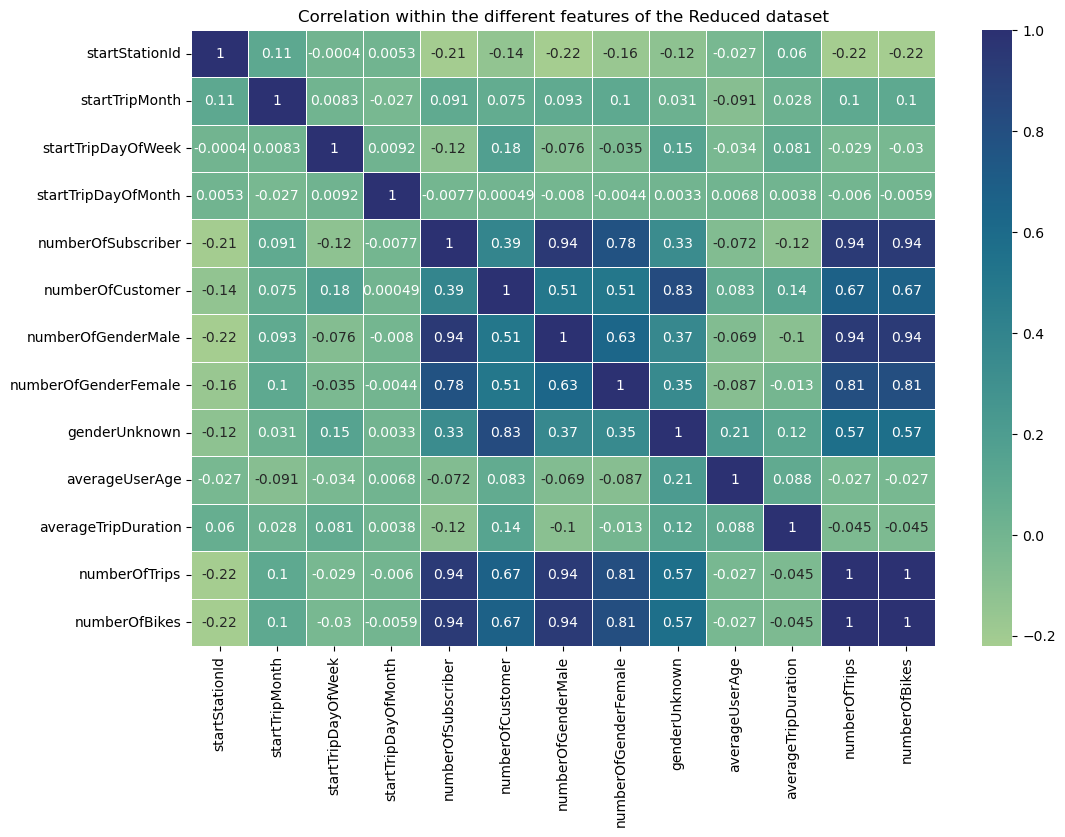

In [200]:
# Heatmap
plt.figure(figsize=(12,8))
plt.title("Correlation within the different features of the Reduced dataset")
plt.xlabel('Features')
plt.ylabel('Features')
sns.heatmap(data_grouped.corr(), cbar=True, linewidths=0.5, cmap="crest", annot=True)
plt.show();

### Drop the **numberOfTrips**

This feature will not be used

In [201]:
data_grouped = data_grouped.drop('numberOfTrips', axis=1)

### Summarizations & Visualising the reduced/grouped dataset

##### Ploting the relationship among the features

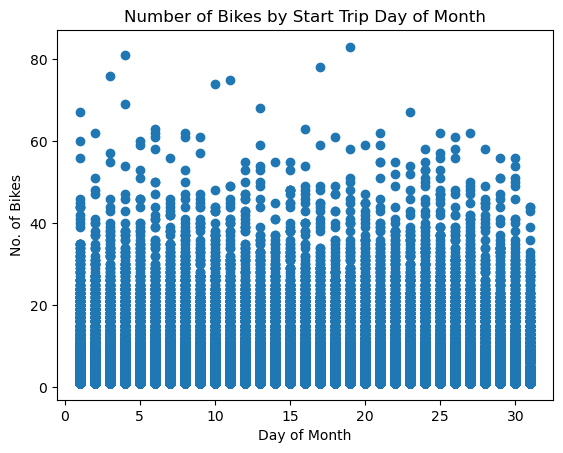

In [202]:
fig, ax = plt.subplots()
plt.title('Number of Bikes by Start Trip Day of Month')
plt.xlabel("Day of Month")
plt.ylabel("No. of Bikes")
ax.scatter(data_grouped["startTripDayOfMonth"], data_grouped["numberOfBikes"]);

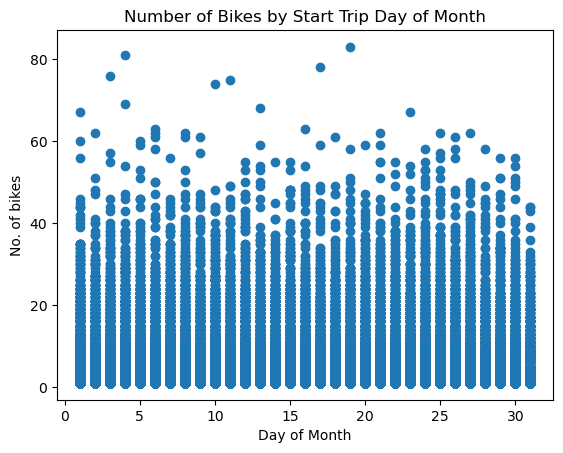

In [203]:
fig, ax = plt.subplots()
plt.title('Number of Bikes by Start Trip Day of Month')
plt.xlabel("Day of Month")
plt.ylabel("No. of bikes")
ax.scatter(data_grouped["startTripDayOfMonth"], data_grouped["numberOfBikes"]);

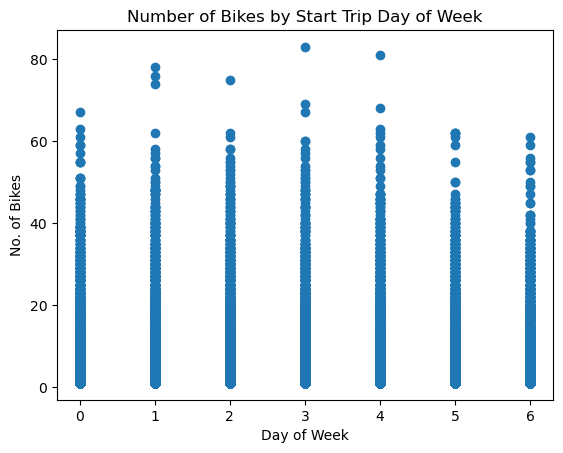

In [204]:
fig, ax = plt.subplots()
plt.title('Number of Bikes by Start Trip Day of Week')
plt.xlabel("Day of Week")
plt.ylabel("No. of Bikes")
ax.scatter(data_grouped["startTripDayOfWeek"], data_grouped["numberOfBikes"]);

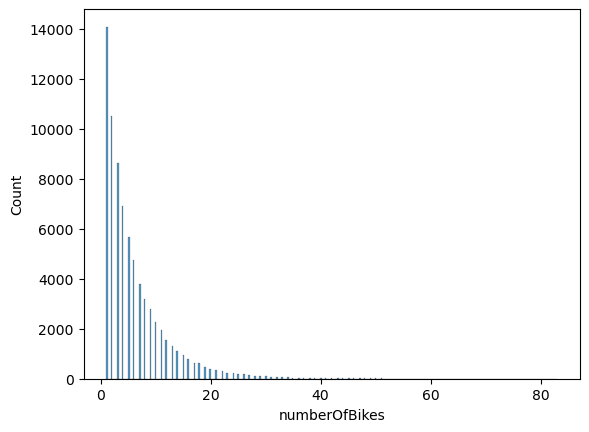

In [205]:
# Frequency of the number of bikes
sns.histplot(data=data_grouped, x="numberOfBikes");

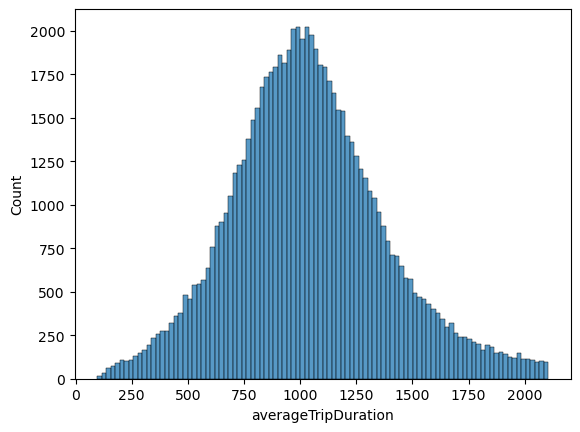

In [206]:
# Frequency for the number of trips

sns.histplot(data=data_grouped, x="averageTripDuration");

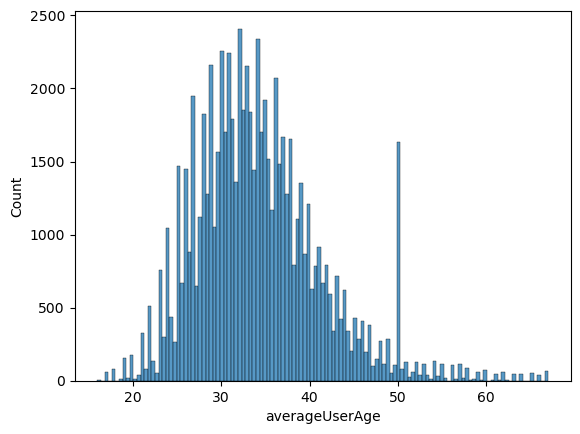

In [207]:
# Frequency of average user age

sns.histplot(data=data_grouped, x="averageUserAge");

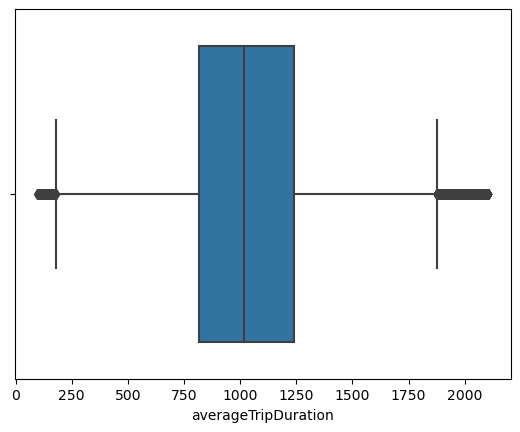

In [208]:
sns.boxplot(x=data_grouped["averageTripDuration"]);

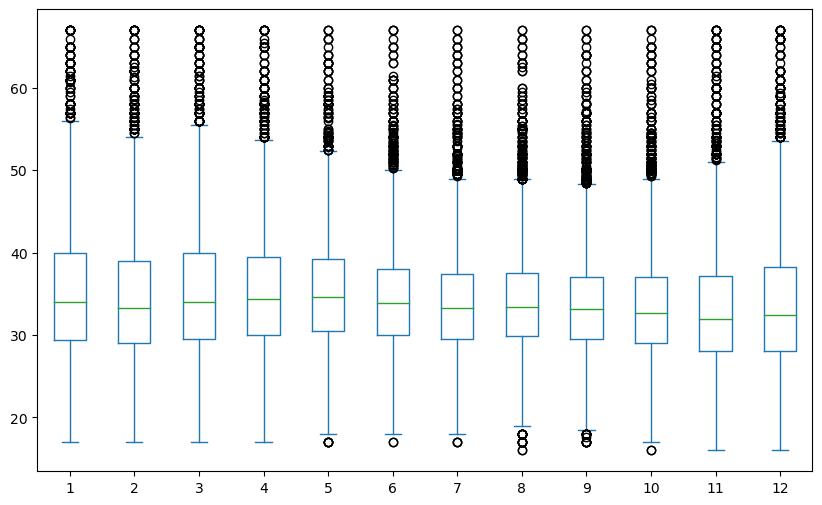

In [209]:

data_grouped.pivot(columns='startTripMonth', values='averageUserAge').plot(kind = 'box', figsize = (10, 6));


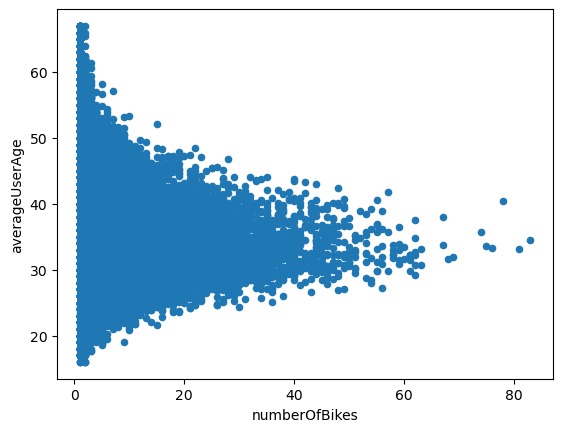

In [210]:
data_grouped.plot(kind='scatter', x='numberOfBikes', y='averageUserAge');

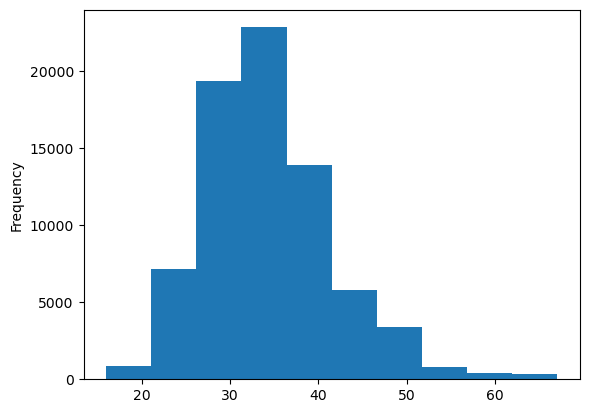

In [211]:
df_data_grouped['averageUserAge'].plot(kind='hist');

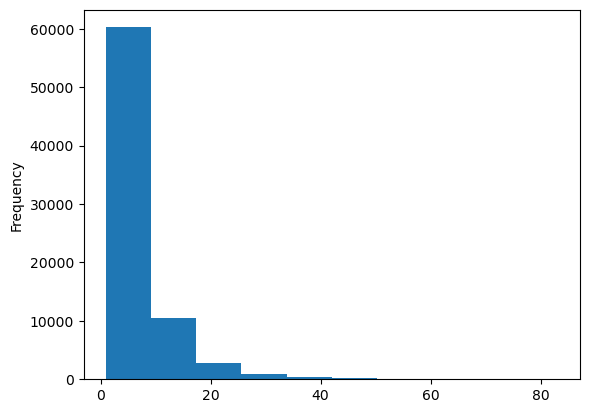

In [212]:
df_data_grouped['numberOfBikes'].plot(kind='hist');

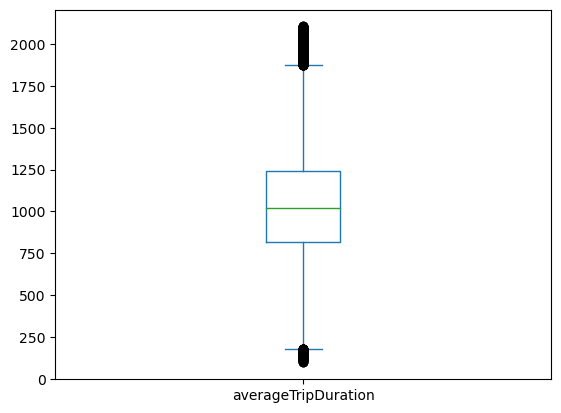

In [213]:
# Box plot
df_data_grouped.plot.box(y='averageTripDuration');

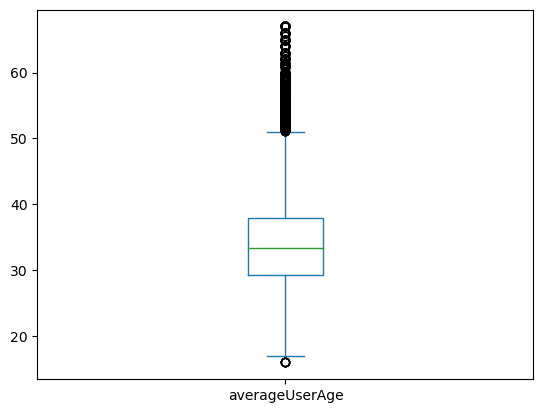

In [214]:
# Box plot
df_data_grouped.plot.box(y='averageUserAge');

In [215]:
data_grouped.head(1)

startStationId  startTripMonth  startTripDayOfWeek  startTripDayOfMonth  \
0               1               1                   0                    7   

   numberOfSubscriber  numberOfCustomer  numberOfGenderMale  \
0                   1                 0                   1   

   numberOfGenderFemale  genderUnknown  averageUserAge  averageTripDuration  \
0                     0              0            25.0                839.0   

   numberOfBikes  
0              1

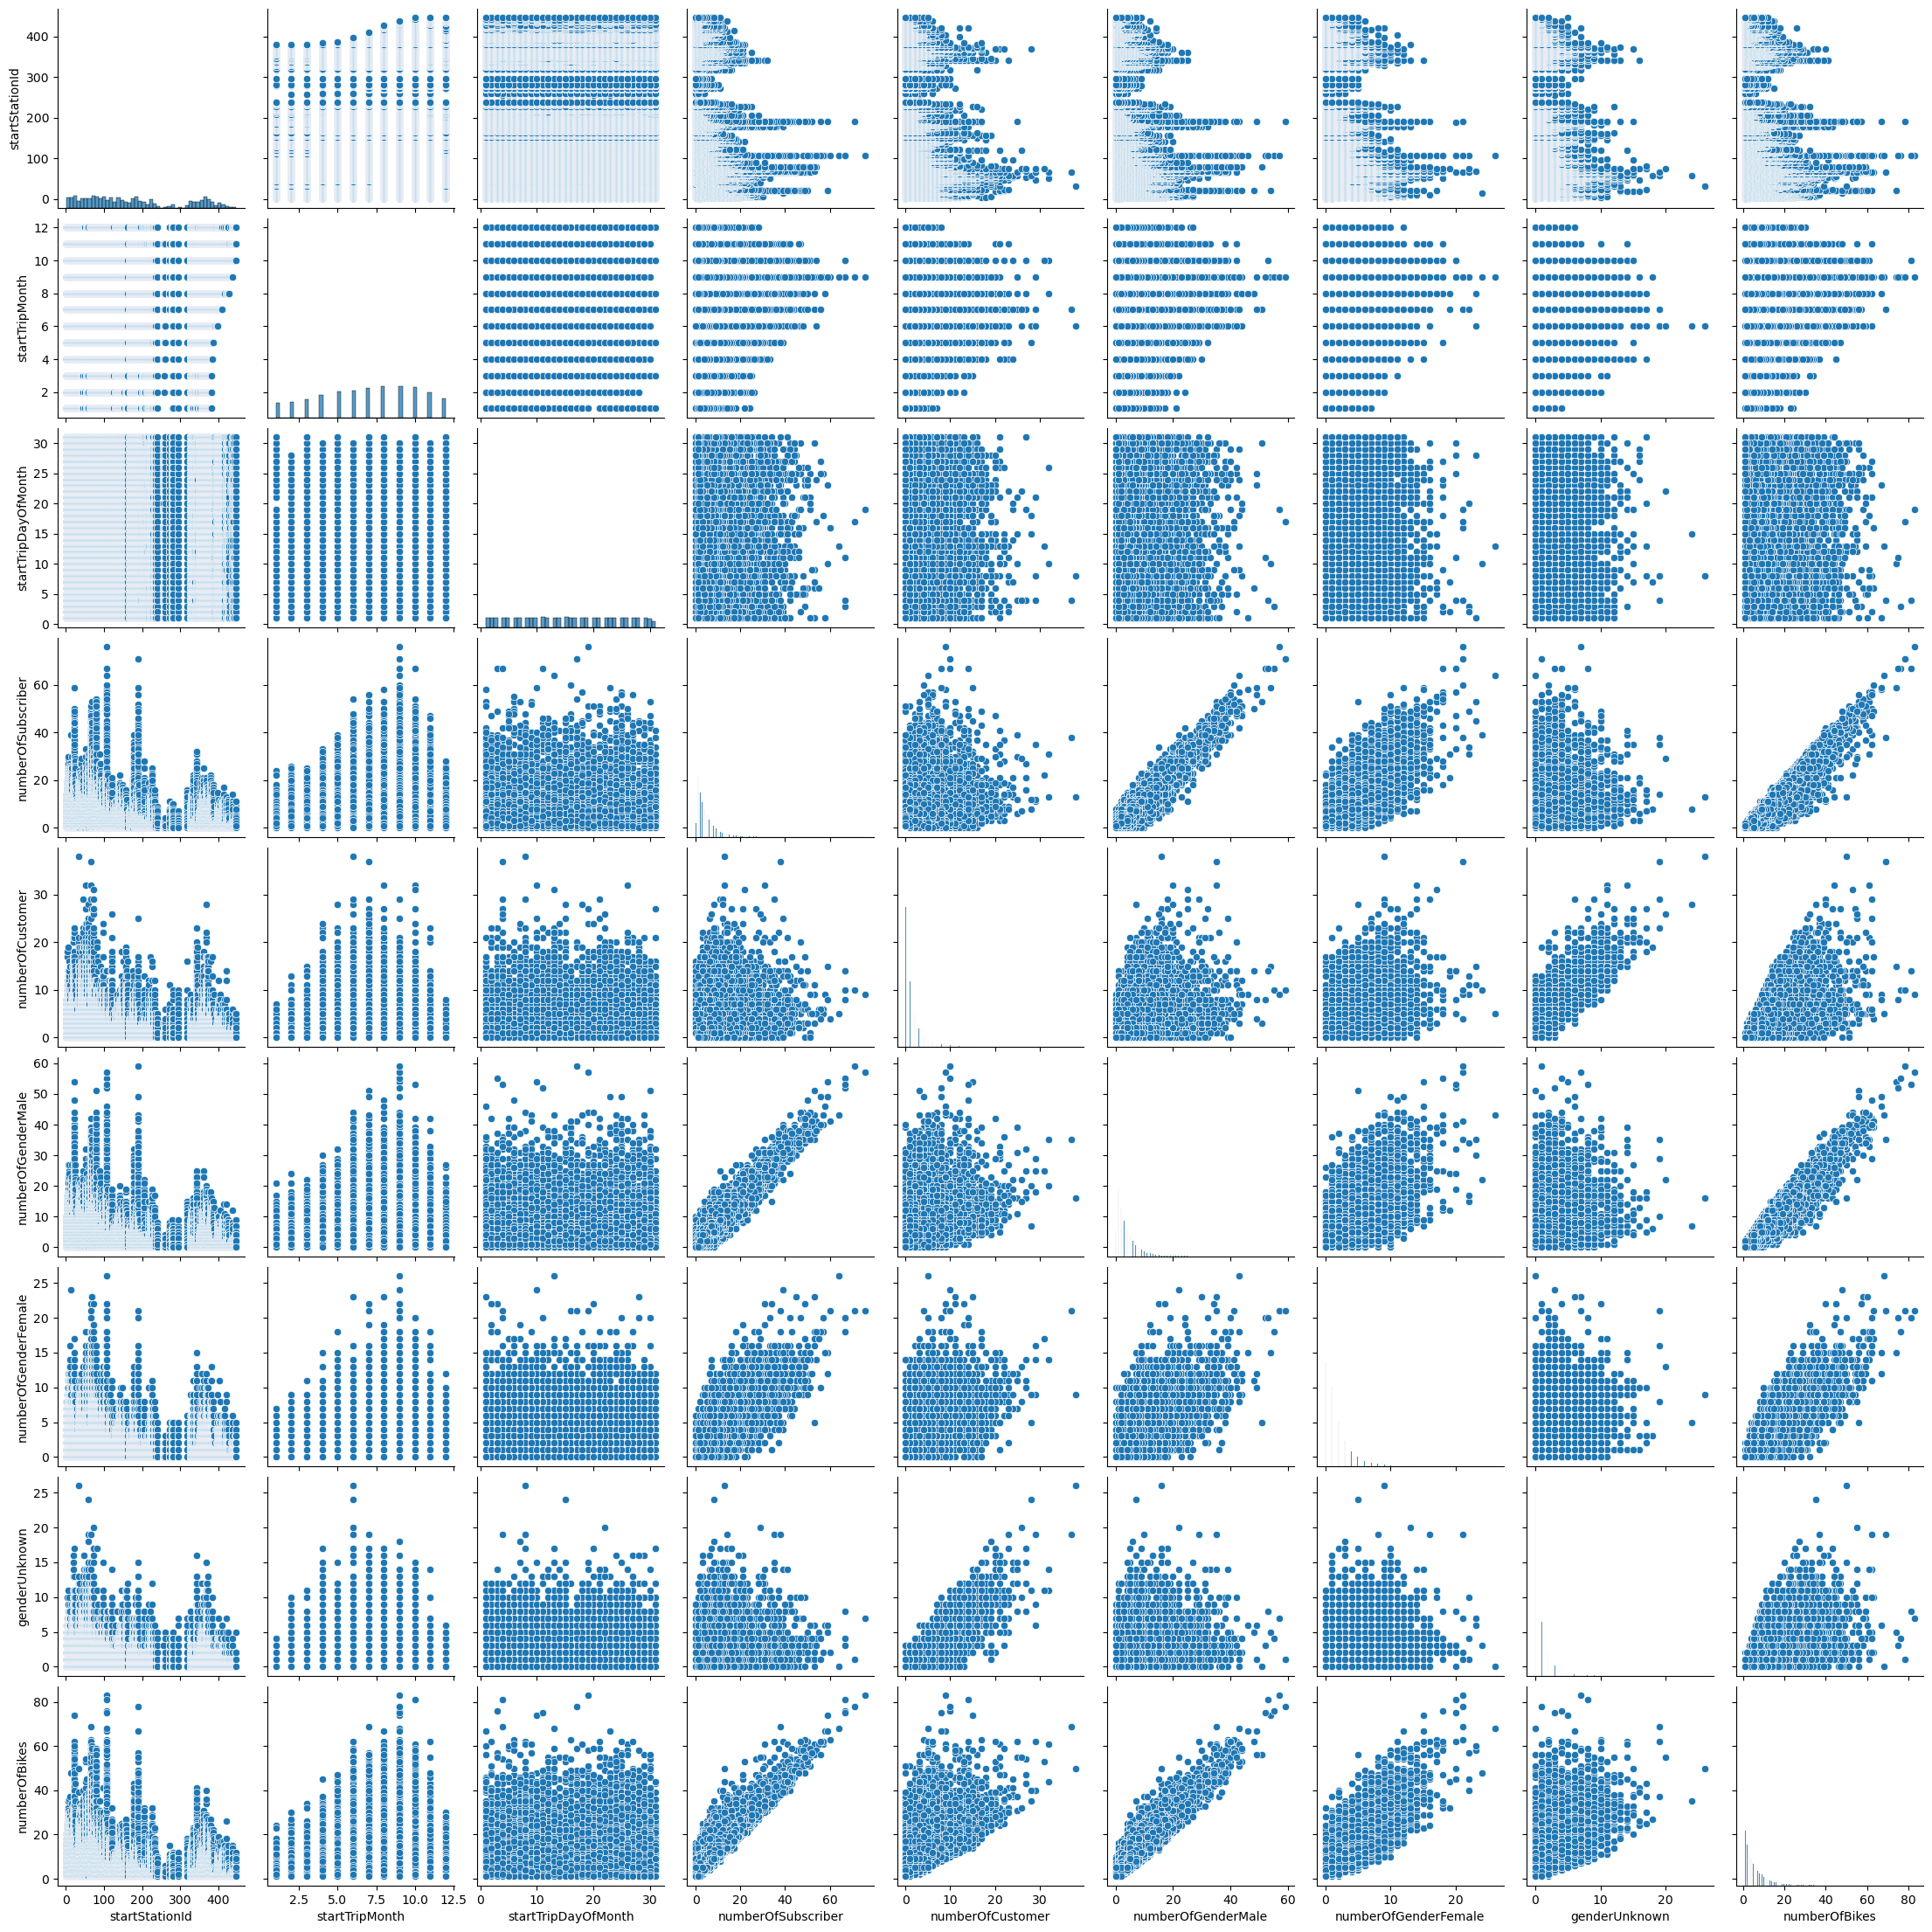

In [216]:
# Pairplot
sns.pairplot(data_grouped[
    [
        'startStationId', 'startTripMonth', 'startTripDayOfMonth', 'numberOfSubscriber', 'numberOfCustomer', 'numberOfGenderMale',
        'numberOfGenderFemale', 'genderUnknown', 'numberOfBikes'
    ]
]);

### Building the ML model

Drop Columns not to be used for ML training

In [217]:
data_grouped = data_grouped.drop(['averageTripDuration', 'averageUserAge'], axis=1)

In [218]:
data_grouped.head(1)

startStationId  startTripMonth  startTripDayOfWeek  startTripDayOfMonth  \
0               1               1                   0                    7   

   numberOfSubscriber  numberOfCustomer  numberOfGenderMale  \
0                   1                 0                   1   

   numberOfGenderFemale  genderUnknown  numberOfBikes  
0                     0              0              1

Build a Linear Regression Model

Split the test and validation dataset

In [219]:
from sklearn.model_selection import train_test_split
    
# Split the data into train and validation sets
df_train, df_validate = train_test_split(data_grouped, train_size=0.8)


In [220]:
# Check Shape of Trarin Dataset
df_train.shape

(59950, 10)

In [221]:
# Check Shape of Validation Dataset
df_validate.shape

(14988, 10)

In [222]:
# Select the features and target variables
X = df_train.drop(['numberOfBikes'], axis=1)
y = df_train['numberOfBikes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [223]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train);

In [224]:
print('Coefficients: \n', np.round(lin_reg.coef_,4))
print('Intercept: \n', np.round(lin_reg.intercept_,0))

Coefficients: 
 [-0.000e+00  1.200e-03 -2.300e-03  1.000e-04  5.933e-01  5.929e-01
  3.952e-01  3.939e-01  3.970e-01]
Intercept: 
 0.0


In [225]:
# R-square value from the trained model
lin_reg.score(X_train, y_train)

# The Score for LR
lin_reg.score(X_test, y_test)

0.9991820676601915

In [226]:
# Predict the target for test data
y_pred = lin_reg.predict(X_test)

In [227]:
# Predicted Values

y_pred[0:5]

array([ 5.96019984, 11.88752466, 16.83943858,  4.97653261,  1.03664681])

In [228]:
# Actual Values

y_test[0:5]

54091     6
69987    12
44455    17
38310     5
45800     1
Name: numberOfBikes, dtype: int64

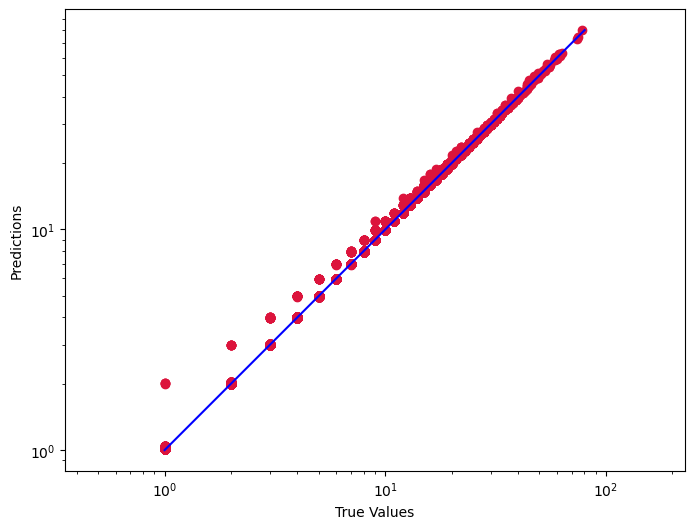

In [229]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

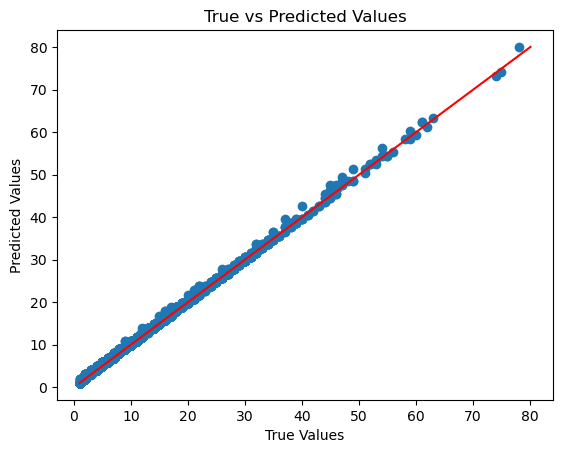

In [230]:
import matplotlib.pyplot as plt

# Create a scatter plot of the true values versus the predicted values
plt.scatter(y_test, y_pred)
point_1 = max(max(y_pred), max(y_test))
point_2 = min(min(y_pred), min(y_test))
plt.plot([point_1, point_2], [point_1, point_2], 'b-', color="red")

# Add labels and a title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Display plot
plt.show();

Validating the model - Using the Validation Dataset

In [231]:
df_validate.head(1)

startStationId  startTripMonth  startTripDayOfWeek  startTripDayOfMonth  \
286               3               8                   5                   24   

     numberOfSubscriber  numberOfCustomer  numberOfGenderMale  \
286                   3                 4                   4   

     numberOfGenderFemale  genderUnknown  numberOfBikes  
286                     2              1              7

In [232]:
df_validate.shape

(14988, 10)

### Evaluation Function

In [233]:
# Evaluation function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create function to evaluate model on a few different levels
def display_model_scores(model):

    # Split data into X & y
    X_train, y_train = df_train.drop("numberOfBikes", axis=1), df_train["numberOfBikes"]

    X_valid, y_valid = df_validate.drop("numberOfBikes", axis=1), df_validate['numberOfBikes']

    X_train.shape, y_train.shape, X_valid.shape, y_valid.shape
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    model_scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training MSE": mean_squared_error(y_train, train_preds),
        "Valid MSE": mean_squared_error(y_valid, val_preds),
        "Training R_2": r2_score(y_train, train_preds),
        "Valid R_2": r2_score(y_valid, val_preds)    
    }
        
    return model_scores


In [234]:
from sklearn.preprocessing import StandardScaler

# Create the scores for the normalized
def display_model_scores_norm(model):

    
    # Split data into X & y
    X_train, y_train = df_train.drop("numberOfBikes", axis=1), df_train["numberOfBikes"]

    X_valid, y_valid = df_validate.drop("numberOfBikes", axis=1), df_validate['numberOfBikes']

    X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

    scaler = StandardScaler()
    scaler.fit(X_train)
    scaler.fit(X_valid)

    X_train_norm = scaler.transform(X_train)
    X_valid_norm = scaler.transform(X_valid)
    
    train_preds = model.predict(X_train_norm)
    val_preds = model.predict(X_valid_norm)

    model_scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training MSE": mean_squared_error(y_train, train_preds),
        "Valid MSE": mean_squared_error(y_valid, val_preds),
        "Training R_2": r2_score(y_train, train_preds),
        "Valid R_2": r2_score(y_valid, val_preds)    
    }
        
    return model_scores

Validation Scores for Linear Regression in **MAE**, **MSE** and **R2**

In [235]:
display_model_scores(lin_reg)

{'Training MAE': 0.07159673726149182,
 'Valid MAE': 0.07116956076488677,
 'Training MSE': 0.03550683522868861,
 'Valid MSE': 0.033262408864968715,
 'Training R_2': 0.9991058308026523,
 'Valid R_2': 0.999170048012062}

#### Testing the model

In [236]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train);
lin_reg_model.score(X_test, y_pred)

display_model_scores(lin_reg_model)

{'Training MAE': 0.07159673726149182,
 'Valid MAE': 0.07116956076488677,
 'Training MSE': 0.03550683522868861,
 'Valid MSE': 0.033262408864968715,
 'Training R_2': 0.9991058308026523,
 'Valid R_2': 0.999170048012062}

The Coefficent and intercept

In [237]:
# Print the intercept and coef

print(f'Intercept: {lin_reg.intercept_}')
print(f'Coefficent: {lin_reg.coef_}')

Intercept: 0.03869952902870999
Coefficent: [-2.41837745e-05  1.15313338e-03 -2.32605511e-03  8.15733475e-05
  5.93297144e-01  5.92918835e-01  3.95236201e-01  3.93943262e-01
  3.97036516e-01]


Hyperparameter **Regularization strength**

### Explain the Linear Regression Model

- LIME

In [238]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:

class_names = X_train.columns
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [240]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    X_train, 
    feature_names=class_names, 
    class_names=['numberOfBikes'], 
    verbose=True, 
    mode='regression')

exp = explainer.explain_instance(X_test[2500], lin_reg.predict)
# exp = exp.as_list()

# exp

Intercept 6.096397730111046
Prediction_local [9.35037865]
Right: 9.925023361998207


In [241]:
# Plot the explanation

exp.show_in_notebook(show_table=True)

In [242]:
exp.as_map()

{0: [(5, -3.27421321075039),
  (8, -1.1089196153926815),
  (6, 1.0245734864259508),
  (3, 0.12141517597120226),
  (7, -0.11616684263747148),
  (4, 0.08300754775810562),
  (1, -0.03538852897370775),
  (0, 0.029018216219799466),
  (2, 0.022692846960610077)],
 1: [(5, 3.27421321075039),
  (8, 1.1089196153926815),
  (6, -1.0245734864259508),
  (3, -0.12141517597120226),
  (7, 0.11616684263747148),
  (4, -0.08300754775810562),
  (1, 0.03538852897370775),
  (0, -0.029018216219799466),
  (2, -0.022692846960610077)]}

In [243]:
exp.predicted_value

9.925023361998207

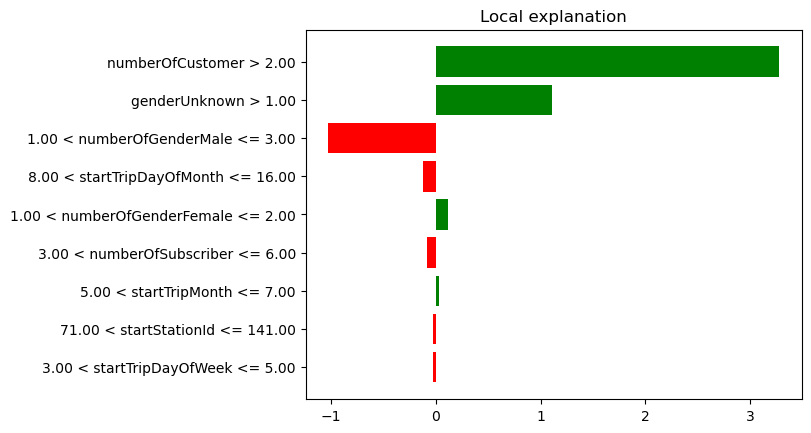

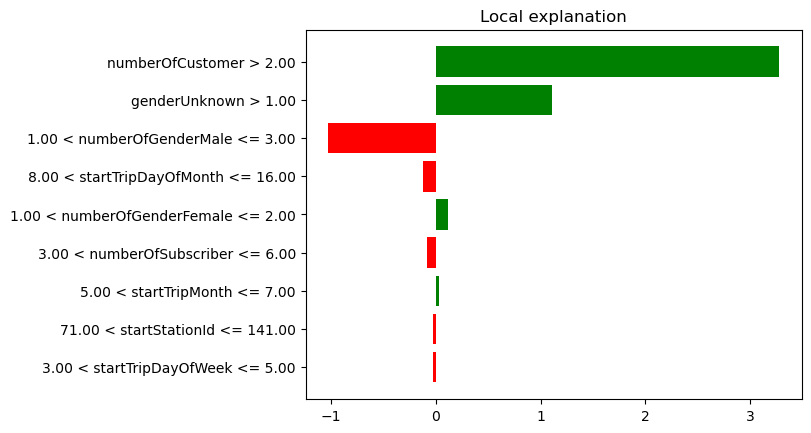

In [244]:
 exp.as_pyplot_figure()

In [245]:
exp.save_to_file('lime.html')

In [246]:
import shap
print(f"Shap version used: {shap. __version__ }")

Shap version used: 0.41.0


### RandomForestRegressor Model

In [248]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RandomForestRegressor instance
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model
rf.fit(X_train, y_train);

In [249]:
y_pred = rf.predict(X_test)

In [251]:
# The score for RF

rf.score(X_test, y_test)

0.998334479987192

Show the scores of RandomForestRegressor

In [252]:
display_model_scores(rf)

{'Training MAE': 0.036683069224353604,
 'Valid MAE': 0.07426741393114487,
 'Training MSE': 0.02236156630525438,
 'Valid MSE': 0.07747125700560449,
 'Training R_2': 0.9994368683194144,
 'Valid R_2': 0.9980669643013265}

Hyper Parameter Tuning using RandomizedSearchCV

Tuning takes long

In [253]:
from sklearn.model_selection import RandomizedSearchCV

#  hyperparameters
rf_grid = {"n_estimators": np.arange(0, 1500),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(0, 1000),
           "min_samples_leaf": np.arange(0, 100),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [254]:
display_model_scores(rs_model)

{'Training MAE': 0.5541159811207981,
 'Valid MAE': 0.5586555813268437,
 'Training MSE': 2.258760362275175,
 'Valid MSE': 2.029768032424116,
 'Training R_2': 0.9431176018046052,
 'Valid R_2': 0.9493539382429483}

In [255]:
print(rs_model.best_params_)

{'n_estimators': 1107, 'min_samples_split': 318, 'min_samples_leaf': 68, 'max_samples': 10000, 'max_features': 0.5, 'max_depth': 5}


Explain LIME for RF

In [256]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
class_names = X_train.columns
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [258]:
from lime.lime_tabular import LimeTabularExplainer

explainer_rf = LimeTabularExplainer(
    X_train, 
    feature_names=class_names, 
    class_names=['numberOfBikes'], 
    verbose=True, 
    mode='regression')

exp_rf = explainer_rf.explain_instance(X_test[2500], rf.predict)


Intercept 7.091023414229341
Prediction_local [10.39720445]
Right: 9.99


In [259]:
# Plot the explanation

exp_rf.show_in_notebook(show_table=True)

### K KNeighborsRegressor

Normalize data

In [263]:
from sklearn.preprocessing import StandardScaler

# StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_norm = scaler.transform(X)

In [264]:
from sklearn.neighbors import KNeighborsRegressor

#Split data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Instance of the KNeighborsRegressor class
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train);

In [265]:
# Make predictions on the test set
y_pred = knn.predict(X_train)

In [266]:
# The Score for KNN

knn.score(X_test, y_test)

0.991073217776448

Validate the model - Using **K-fold Cross Validation**

In [267]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5, scoring='r2')

print(f'Cross-validation R-squared: {scores.mean():.3f} +/- {scores.std():.3f}')

Cross-validation R-squared: 0.974 +/- 0.000


Validating Using **Bootstrapping**

In [268]:
from sklearn.utils import resample
scores = []

for i in range(50):
    X_boot, y_boot = resample(X_norm, y)
    X_train, X_test, y_train, y_test = train_test_split(X_boot, y_boot, test_size=0.2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(r2_score(y_test, y_pred))
    
print(f'Bootstrapped R-squared: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

Bootstrapped R-squared: 0.990 +/- 0.000


Validating Using **Holdout validation**

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f'Test R-squared: {r2_score(y_test, y_pred):.3f}')

Test R-squared: 0.991


### Support Vector Regression (SVR)

In [270]:
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

svr = SVR(kernel='linear', C=1)

# Fit the model
svr.fit(X_train, y_train);

In [271]:
# Make predictions on the test set
y_pred = svr.predict(X_test)

In [272]:
svr.score(X_test, y_test)

0.998951064921166

Validate the SVM model 

In [273]:
display_model_scores_norm(svr)

{'Training MAE': 0.184462825063744,
 'Valid MAE': 0.18330238289729459,
 'Training MSE': 0.055613454228033245,
 'Valid MSE': 0.05219814962377705,
 'Training R_2': 0.9985994854960027,
 'Valid R_2': 0.9986975700340042}

## Gradient Boosting Regressor

In [274]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)

gbr.fit(X_train, y_train);

Validate the model

In [275]:
display_model_scores_norm(gbr)

{'Training MAE': 0.10199813107609527,
 'Valid MAE': 0.10679993012745977,
 'Training MSE': 0.05365666826233308,
 'Valid MSE': 0.06798783668802534,
 'Training R_2': 0.9986487632681574,
 'Valid R_2': 0.998303591286972}

Validating using the ```explained_variance_score```

In [276]:
y_pred = gbr.predict(X_test)

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)

print(evs)

0.9983417332402551


Validating using ```cohen_kappa_score```

In [277]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa = cohen_kappa_score(np.around(y_test),np.around(y_pred))

print(cohen_kappa)

0.9473864200772786


Validating using ```Mean Percentage Error```

In [278]:
from sklearn.metrics import mean_absolute_error
mpe = 100 * (mean_absolute_error(y_test, y_pred) / np.mean(y_test))

print(mpe)

1.7448610575338543


### SGDRegressor

In [279]:
from sklearn.linear_model import SGDRegressor

#Split data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

sgd_reg = SGDRegressor()

sgd_reg.fit(X_train, y_train)

y_pred = sgd_reg.predict(X_test)


In [280]:

y_pred = sgd_reg.predict(X_test)

In [281]:
y_pred

array([ 5.95243974, 11.9103238 , 16.84221829, ...,  1.01442343,
        8.9393335 ,  3.98046485])

In [299]:
display_model_scores_norm(sgd_reg)

{'Training MAE': 0.11657398172329664,
 'Valid MAE': 0.1166658162066972,
 'Training MSE': 0.03996885405538249,
 'Valid MSE': 0.03810563609988,
 'Training R_2': 0.9989934637114396,
 'Valid R_2': 0.9990492015006752}

## Hyper Tuning and Testing Models

Evaluate Linear Regression Model

In [283]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating the model using Mean Absolute Error - (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Evaluating the model using Mean Squared Error - (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Evaluating the model using R-squared score - R2
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

Mean Absolute Error: 0.06622414288300295
Mean Squared Error: 0.03456805318128357
R-squared score: 0.9991769970689405


Standardizing and Normalizing the datasets

Using standardized and Normalized datasets to train linear regression model

Standardization

In [284]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_test)
X_std_linreg = scaler.transform(X)

Fit the model Using Standardised training set

In [285]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std_linreg, y, test_size=0.2, random_state=42)

# Create the linear regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Predict the target for test data
y_pred = lin_reg.predict(X_test)

In [286]:
lin_reg.score(X_test, y_pred)

1.0

Evaluate the model using Standised X

In [287]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared score: {r2}')

Mean Absolute Error: 0.07124790462844616
Mean Squared Error: 0.034355046273725855
R-squared score: 0.9991820683788096


Normalization

In [288]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm_lin_reg = min_max_scaler.transform(X)

Fit the model using Normalized data

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_lin_reg, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

Evaluate the model using Normalised data

In [290]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared score: {r2}')

Mean Absolute Error: 0.07124698147377789
Mean Squared Error: 0.034355018518965344
R-squared score: 0.9991820690396004


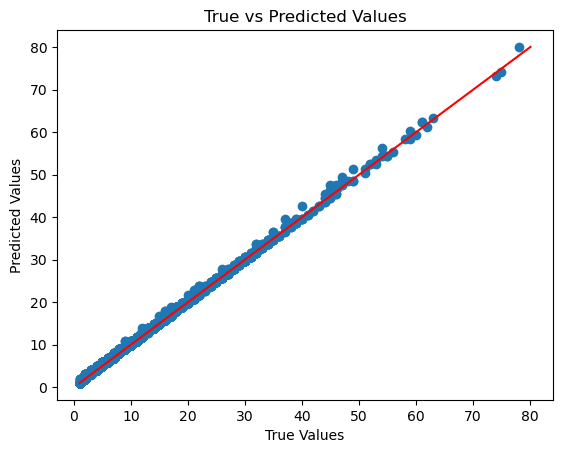

In [291]:
import matplotlib.pyplot as plt

# Create a scatter plot of the true values versus the predicted values
plt.scatter(y_test, y_pred)
point_1 = max(max(y_pred), max(y_test))
point_2 = min(min(y_pred), min(y_test))
plt.plot([point_1, point_2], [point_1, point_2], 'b-', color="red")

# Add labels and a title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Display plot
plt.show();

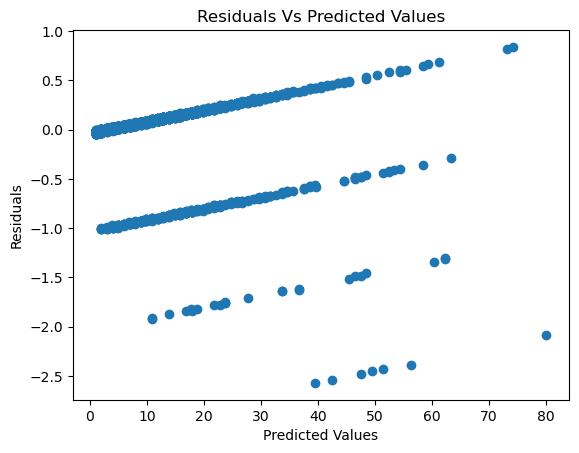

In [292]:
# Calculating the residuals
residuals = y_test - y_pred

# Plotting residuals Vs predicted values
plt.scatter(y_pred, residuals)

# Labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Vs Predicted Values')

# Display the plot
plt.show()

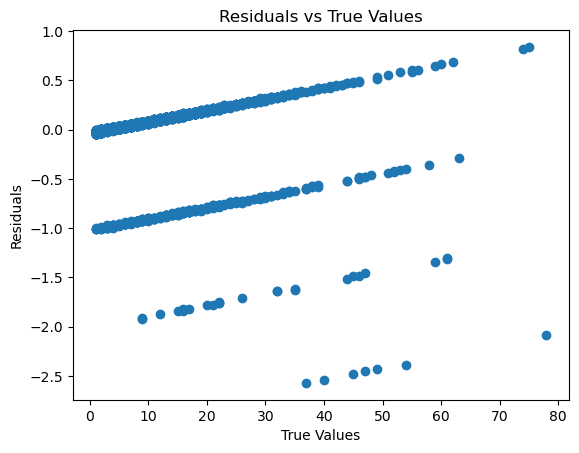

In [293]:
# Plotting Residuals Vs true values
plt.scatter(y_test, residuals)

# Labels and title
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals vs True Values')

# Display the plot
plt.show()

### Hypertuning Linear **LinearRegression Model**

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Defining the range of values for the regularization strength
param_grid = {'normalize': [True, False], 'fit_intercept': [True, False]}

# linear regression model instance
linear_reg = LinearRegression()

# grid search instance
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, return_train_score=True)


Fitting the model on the original data

In [295]:
# Fitting the grid search
grid_search.fit(X, y)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'fit_intercept': True, 'normalize': True}
Best Score: 0.9991048606901943


Fitting the grid Search on standardised data

In [296]:
# Fitting the grid search
grid_search.fit(X_std_linreg, y)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'fit_intercept': True, 'normalize': True}
Best Score: 0.9991048239942151


Fitting the grid Search on Normalised data

In [297]:
# Fitting the grid search
grid_search.fit(X_norm_lin_reg, y)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'fit_intercept': True, 'normalize': True}
Best Score: 0.9991048157153923


In [298]:
from sklearn.linear_model import Lasso

grid_range = np.arange(0.001, 1000)

param_grid = {'alpha': grid_range}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X, y)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Best Parameters: {'alpha': 0.001}
Best Score: 0.9991048779676837
